In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [4]:
!ls

ImageClassification  sample_data


In [5]:
import cv2
import imghdr


In [6]:
data_dir='/content/ImageClassification/data'

In [7]:
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
os.listdir(data_dir)

['sad', 'happy']

In [9]:
for imageclass in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,imageclass)):
    image_path=os.path.join(data_dir,imageclass,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))



In [10]:
data=tf.keras.utils.image_dataset_from_directory(data_dir) 

Found 305 files belonging to 2 classes.


In [11]:
data_iterator=data.as_numpy_iterator()

In [12]:
for d in data_iterator:
   print(d)

(array([[[[127.03125  ,  83.03125  ,  46.03125  ],
         [131.25     ,  87.25     ,  49.75     ],
         [133.24023  ,  89.240234 ,  50.240234 ],
         ...,
         [ 55.621094 ,  48.871094 ,  52.621094 ],
         [ 61.28125  ,  46.28125  ,  46.28125  ],
         [ 77.90039  ,  57.38086  ,  53.640625 ]],

        [[130.95117  ,  86.95117  ,  49.95117  ],
         [132.45117  ,  88.45117  ,  50.95117  ],
         [137.35352  ,  93.353516 ,  54.353516 ],
         ...,
         [ 65.20703  ,  58.45703  ,  62.20703  ],
         [ 68.80469  ,  55.246094 ,  54.52539  ],
         [ 82.353516 ,  63.333984 ,  59.32422  ]],

        [[132.75586  ,  88.75586  ,  51.75586  ],
         [139.30664  ,  95.30664  ,  57.80664  ],
         [138.79492  ,  94.79492  ,  55.79492  ],
         ...,
         [ 79.91406  ,  73.16406  ,  76.91406  ],
         [ 83.51367  ,  70.01367  ,  70.51367  ],
         [ 92.76172  ,  74.66211  ,  72.46289  ]],

        ...,

        [[125.44922  , 103.65234  ,  

In [13]:
batch=data.as_numpy_iterator().next()

In [14]:
batch[0].shape

(32, 256, 256, 3)

In [15]:
len(batch)

2

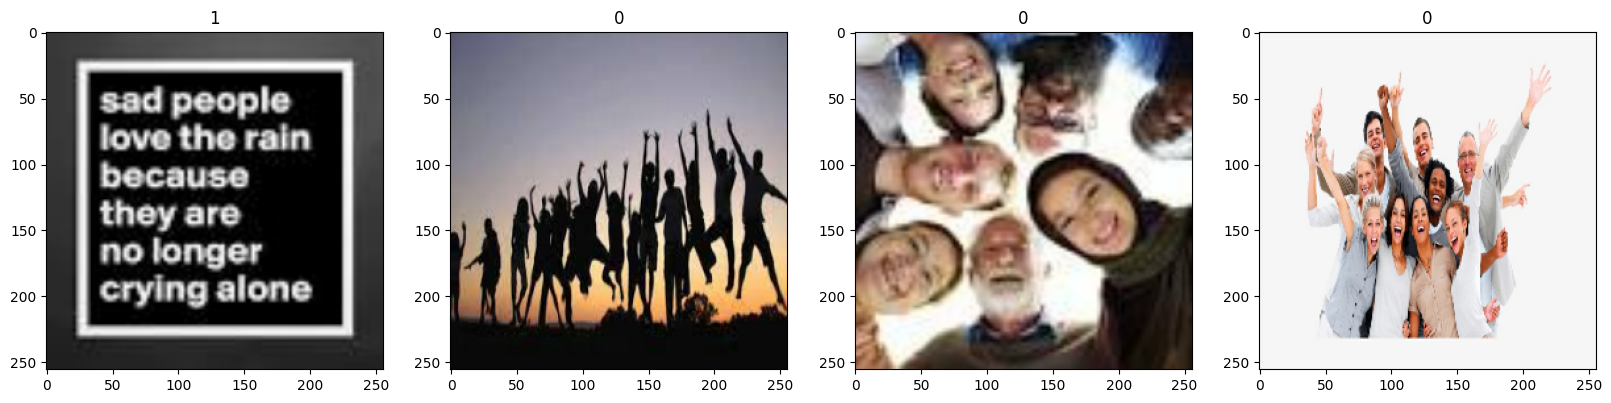

In [16]:
# 0 for happy and 1 for sad
fig,axes=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  axes[idx].imshow(img.astype(int))
  axes[idx].title.set_text(batch[1][idx])

In [17]:
data=data.map(lambda x,y: (x/255,y))

In [28]:
data.as_numpy_iterator().next()

AttributeError: 'tuple' object has no attribute 'shape'

# Split Data

In [19]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [20]:
len(data)

10

In [21]:
train_data=data.take(train_size)
val_data=data.skip(train_size).take(val_size)
test_data=data.skip(train_size+val_size).take(test_size)

# Build Dl Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall,Precision,Accuracy


In [29]:
batch[0].shape

(32, 256, 256, 3)

In [23]:
model=Sequential()
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) #is used to convert multidimensional data into a single-dimensional vector. It is commonly used in neural networks before feeding the data into fully connected (Dense) layers

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [31]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir='logs')

In [32]:
model.fit(train_data,epochs=20,validation_data=val_data,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 1.5644 - accuracy: 0.4241 - val_loss: 0.6999 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 24s 3s/step - loss: 0.7050 - accuracy: 0.4554 - val_loss: 0.6797 - val_accuracy: 0.5781
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.6853 - accuracy: 0.5134 - val_loss: 0.6725 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 19s 2s/step - loss: 0.6493 - accuracy: 0.7054 - val_loss: 0.6672 - val_accuracy: 0.5781
Epoch 5/20
7/7 [==============================] - 20s 2s/step - loss: 0.6108 - accuracy: 0.6607 - val_loss: 0.5381 - val_accuracy: 0.7656
Epoch 6/20
7/7 [==============================] - 42s 6s/step - loss: 0.5799 - accuracy: 0.7098 - val_loss: 0.5614 - val_accuracy: 0.6406
Epoch 7/20
7/7 [==============================] - 21s 3s/step - loss: 0.4909 - accuracy: 0.8036 - val_loss: 0.4377 - val_accuracy: 0.8906
Epoch 8/20
7/7 [==================

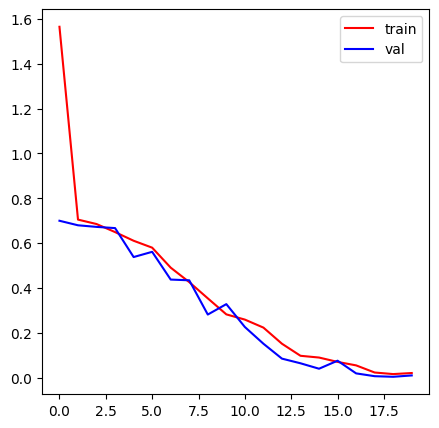

In [36]:
plt.figure(figsize=(5,5))
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='val')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

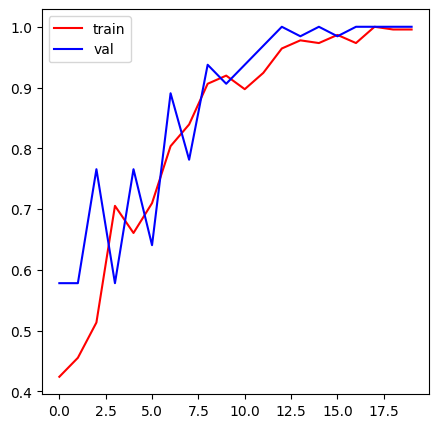

In [38]:
plt.figure(figsize=(5,5))
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='val')
plt.legend()
plt.show

# Evaluate

In [42]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy

In [44]:
pre=Precision()
rec=Recall()
acc=Accuracy()

In [47]:
for batch in test_data.as_numpy_iterator():
  X,y=batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  rec.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 249ms/step


In [48]:
print(f'precision: {pre}, recall: {rec}, accuracy: {acc}')


precision: Precision(name=precision_1,dtype=float32,thresholds=None,top_k=None,class_id=None), recall: Recall(name=recall,dtype=float32,thresholds=None,top_k=None,class_id=None), accuracy: Accuracy(name=accuracy,dtype=float32)


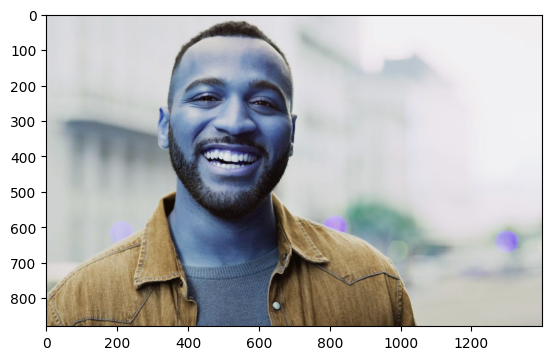

In [50]:
img='/content/ImageClassification/data/happy/05-12-21-happy-people.jpg'
img=cv2.imread(img)
plt.imshow(img.astype(int))
plt.show()

In [51]:
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

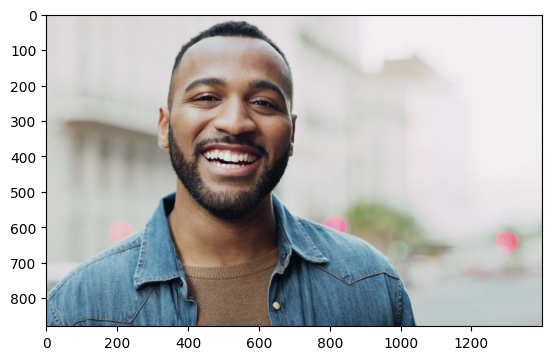

In [53]:
plt.imshow(rgb_image)

In [54]:
image=cv2.resize(img,(256,256))
model.predict(np.expand_dims(image,axis=0))

1/1 [==============================] - 0s 219ms/step


array([[0.]], dtype=float32)

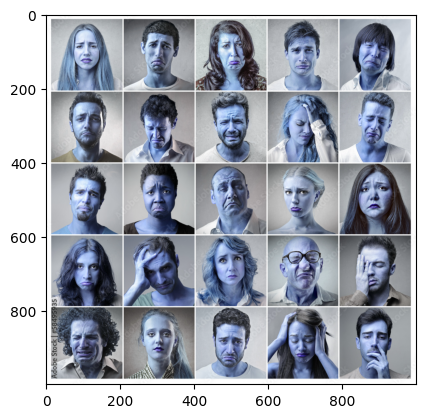

In [56]:
img_s='/content/ImageClassification/data/sad/1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg'
img_scv2=cv2.imread(img_s)
plt.imshow(img_scv2)

In [57]:
model.predict(np.expand_dims(cv2.resize(img_scv2,(256,256)),axis=0))

1/1 [==============================] - 0s 77ms/step


array([[1.]], dtype=float32)

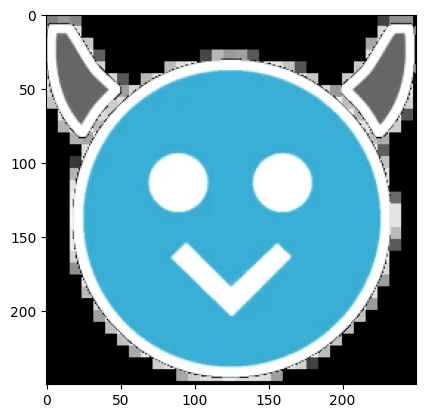

In [63]:
img_s='/content/تنزيل-هابي-مود-الذهبي.png'
img_scv=cv2.imread(img_s)
plt.imshow(img_scv2)

In [64]:
model.predict(np.expand_dims(cv2.resize(img_scv,(256,256)),axis=0))

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)

# `Save the Model`

In [66]:
from tensorflow.keras.models import load_model


In [67]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
new_model=load_model('/content/models/imageclassifier.h5')

In [69]:
new_model.predict(np.expand_dims(cv2.resize(img_scv,(256,256)),axis=0))

1/1 [==============================] - 0s 176ms/step


array([[1.]], dtype=float32)

# Deployment

In [ ]:
!pip install streamlit

In [2]:
!wget -q -O - ipv4.icanhazip.com


34.147.44.96


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.44.96:8501

npx: installed 22 in 2.39s
your url is: https://spicy-bananas-report.loca.lt
2024-06-14 23:12:51.826 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 600, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 23, in <module>
    main()
  File "/content/app.py", line 2, in main
    st.title('Image Prediction App')
NameError: name 'st' is not defined
2024-06-14 23:13:52.906209: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 23:13:52.906290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: At

In [ ]:
if __name__ == '__main__':
    main()

In [8]:
!zip -r /content/file.zip /content/image_Predictor

  adding: content/image_Predictor/ (stored 0%)
  adding: content/image_Predictor/logs/ (stored 0%)
  adding: content/image_Predictor/logs/train/ (stored 0%)
  adding: content/image_Predictor/logs/train/events.out.tfevents.1718402181.6991ab690f26.174.0.v2 (deflated 87%)
  adding: content/image_Predictor/logs/validation/ (stored 0%)
  adding: content/image_Predictor/logs/validation/events.out.tfevents.1718402200.6991ab690f26.174.1.v2 (deflated 77%)
  adding: content/image_Predictor/logs/.ipynb_checkpoints/ (stored 0%)
  adding: content/image_Predictor/app.py (deflated 50%)
  adding: content/image_Predictor/ImageClassification/ (stored 0%)
  adding: content/image_Predictor/ImageClassification/.gitignore (stored 0%)
  adding: content/image_Predictor/ImageClassification/.ipynb_checkpoints/ (stored 0%)
  adding: content/image_Predictor/ImageClassification/.git/ (stored 0%)
  adding: content/image_Predictor/ImageClassification/.git/hooks/ (stored 0%)
  adding: content/image_Predictor/ImageCla

In [9]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>